# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 100
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | \r\nThe worst cabin experie...
1,✅ Trip Verified | First time flying with Briti...
2,✅ Trip Verified | The latest affront. Stood i...
3,Not Verified | Booked a flight return flight ...
4,✅ Trip Verified | I tried to check in on line...


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
# Printing Top 5 Rows

df.head()

,reviews
0,✅ Trip Verified | \r\nThe worst cabin experie...
1,✅ Trip Verified | First time flying with Briti...
2,✅ Trip Verified | The latest affront. Stood i...
3,Not Verified | Booked a flight return flight ...
4,✅ Trip Verified | I tried to check in on line...


In [6]:
# Printing Top 5 Rows

df.tail()

,reviews
3499,HKG-LHR in New Club World on Boeing 777-300 - ...
3500,LHR to HAM. Purser addresses all club passenge...
3501,My son who had worked for British Airways urge...
3502,London City-New York JFK via Shannon on A318 b...
3503,SIN-LHR BA12 B747-436 First Class. Old aircraf...


In [7]:
# Printing Random 10 Rows

df.sample(10)

,reviews
35,✅ Trip Verified | My husband and myself were ...
943,✅ Trip Verified | London to Frankfurt. I need...
159,"✅ Trip Verified | BA cancelled my flight, I n..."
2333,London Heathrow to Miami on one of British Air...
5,✅ Trip Verified | A catalogue of failures. We...
2370,Athens to London Heathrow return. British Airw...
133,"✅ Trip Verified | Holidays ruined, 2 suitcase..."
2713,Very good flight in Club World from start to f...
1861,✅ Verified Review | London Heathrow to Budapes...
1860,Singapore to Heathrow. British Airways gave me...


In [8]:
# Printing the Total Numbers of Rows and Columns

df.shape

(3504, 1)

In [9]:
# Printing the Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3504 non-null   object
dtypes: object(1)
memory usage: 27.5+ KB


In [10]:
# Printing Columns Nams

df.columns

Index(['reviews'], dtype='object')

In [11]:
# Printing Null Values

df.isnull().sum()

reviews    0
dtype: int64

In [12]:
# Printing the Duplicated Values

df.duplicated().sum()

10

In [13]:
# Droping Duplicated Values

df.drop_duplicates(inplace=True)

In [14]:
# Printing the Duplicated Values After Removing Duplicated Values

df.duplicated().sum()

0

In [15]:
# Printing the Total Numbers of Rows and Columns After Removing Duplicated Values

df.shape

(3494, 1)

In [16]:
# Printing First Review Columns

df.reviews[0]

'✅ Trip Verified |  \r\nThe worst cabin experience ever: cramped seats, very low cost style and uncomfortable. Could suit for short flights but not for a 5 hours service. Catering is also a shame: 250ml of water + a chocolate bar for a 5 hours service. Will never fly BA again. '

# Text Cleaning


  - Remove htmls tags
  - Remove special characters
  - Converting every thing to lower case
  - Removing Stop words
  - Stemming

**Removing HTML Tags**

In [17]:
import re
clean = re.compile('<.*?>')
re.sub(clean, '', df.iloc[2].reviews)

'✅ Trip Verified |  The latest affront. Stood in first class line for an hour. Finally go up front and the BA agent let 4 supposed VIPS with 12-14 large to-be-checked bags in front of all of us. Arrogant and unapologetic. Add this to a long list of post-Covid disappointments. We are done with BA.'

**Clean HTML Tags**

In [18]:
# Function to clean html tags

def clean_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [19]:
df.reviews = df.reviews.apply(clean_html)

In [20]:
df.head()

,reviews
0,✅ Trip Verified | \r\nThe worst cabin experie...
1,✅ Trip Verified | First time flying with Briti...
2,✅ Trip Verified | The latest affront. Stood i...
3,Not Verified | Booked a flight return flight ...
4,✅ Trip Verified | I tried to check in on line...


**Converting into Lower**

In [21]:
def convert_lower(text):
    return text.lower()

In [22]:
df.reviews = df.reviews.apply(convert_lower)

In [23]:
df.head()

,reviews
0,✅ trip verified | \r\nthe worst cabin experie...
1,✅ trip verified | first time flying with briti...
2,✅ trip verified | the latest affront. stood i...
3,not verified | booked a flight return flight ...
4,✅ trip verified | i tried to check in on line...


**Remove Spaces and Strings**

In [24]:
df.reviews = df.reviews.str.strip()
df.reviews = df.reviews.str.lstrip('✅ trip verified |')
df.reviews = df.reviews.str.lstrip('not verified |')
df.head()

,reviews
0,\r\nthe worst cabin experience ever: cramped s...
1,st time flying with british airways and first ...
2,he latest affront. stood in first class line f...
3,booked a flight return flight between london a...
4,check in on line and was informed that this wa...


**Removing Special Characters**

In [25]:
def remove_special(text):
    x=''
    
    for i in text:
        if i.isalnum():
            x = x+i
        else:
            x = x+ ' '
    return x

In [26]:
df.reviews = df.reviews.apply(remove_special)

In [27]:
df.head()

,reviews
0,the worst cabin experience ever cramped sea...
1,st time flying with british airways and first ...
2,he latest affront stood in first class line f...
3,booked a flight return flight between london a...
4,check in on line and was informed that this wa...


**Removing Stop Words**

In [28]:
import nltk

In [29]:
from nltk.corpus import stopwords

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
from nltk.corpus import stopwords

In [35]:
sw_list = stopwords.words('english')

In [36]:
df['reviews'] = df['reviews'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

In [38]:
df.reviews.head()

0    worst cabin experience ever cramped seats low ...
1    st time flying british airways first time flyi...
2    latest affront stood first class line hour fin...
3    booked flight return flight london munich 3 11...
4    check line informed possible given reason tele...
Name: reviews, dtype: object

In [39]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [40]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,POS tagged
0,worst cabin experience ever cramped seats low ...,"[(worst, a), (cabin, n), (experience, n), (eve..."
1,st time flying british airways first time flyi...,"[(st, a), (time, n), (flying, v), (british, a)..."
2,latest affront stood first class line hour fin...,"[(latest, a), (affront, n), (stood, v), (first..."
3,booked flight return flight london munich 3 11...,"[(booked, a), (flight, n), (return, n), (fligh..."
4,check line informed possible given reason tele...,"[(check, n), (line, n), (informed, v), (possib..."


In [41]:


# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()



,reviews,POS tagged,Lemma
0,worst cabin experience ever cramped seats low ...,"[(worst, a), (cabin, n), (experience, n), (eve...",bad cabin experience ever cramp seat low cos...
1,st time flying british airways first time flyi...,"[(st, a), (time, n), (flying, v), (british, a)...",st time fly british airway first time fly am...
2,latest affront stood first class line hour fin...,"[(latest, a), (affront, n), (stood, v), (first...",late affront stand first class line hour fin...
3,booked flight return flight london munich 3 11...,"[(booked, a), (flight, n), (return, n), (fligh...",booked flight return flight london munich 3 ...
4,check line informed possible given reason tele...,"[(check, n), (line, n), (informed, v), (possib...",check line inform possible give reason telep...


In [42]:
df[['reviews','Lemma']]

,reviews,Lemma
0,worst cabin experience ever cramped seats low ...,bad cabin experience ever cramp seat low cos...
1,st time flying british airways first time flyi...,st time fly british airway first time fly am...
2,latest affront stood first class line hour fin...,late affront stand first class line hour fin...
3,booked flight return flight london munich 3 11...,booked flight return flight london munich 3 ...
4,check line informed possible given reason tele...,check line inform possible give reason telep...
...,...,...
3499,hkg lhr new club world boeing 777 300 26 08 12...,hkg lhr new club world boeing 777 300 26 08 ...
3500,lhr ham purser addresses club passengers name ...,lhr ham purser address club passenger name b...
3501,son worked british airways urged fly british a...,son work british airway urge fly british air...
3502,london city new york jfk via shannon a318 real...,london city new york jfk via shannon a318 re...


**Sentiment Analysis using VADER**

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.


In [43]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.2 MB/s eta 0:00:00


In [44]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [45]:
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

In [46]:
df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

In [47]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)

In [48]:
df.head()

,reviews,POS tagged,Lemma,Sentiment,Analysis
0,worst cabin experience ever cramped seats low ...,"[(worst, a), (cabin, n), (experience, n), (eve...",bad cabin experience ever cramp seat low cos...,-0.9022,Negative
1,st time flying british airways first time flyi...,"[(st, a), (time, n), (flying, v), (british, a)...",st time fly british airway first time fly am...,0.9844,Positive
2,latest affront stood first class line hour fin...,"[(latest, a), (affront, n), (stood, v), (first...",late affront stand first class line hour fin...,-0.4939,Negative
3,booked flight return flight london munich 3 11...,"[(booked, a), (flight, n), (return, n), (fligh...",booked flight return flight london munich 3 ...,0.7717,Positive
4,check line informed possible given reason tele...,"[(check, n), (line, n), (informed, v), (possib...",check line inform possible give reason telep...,-0.5423,Negative


In [49]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    2058
Negative    1055
Neutral      381
Name: Analysis, dtype: int64


**Visual Representation**

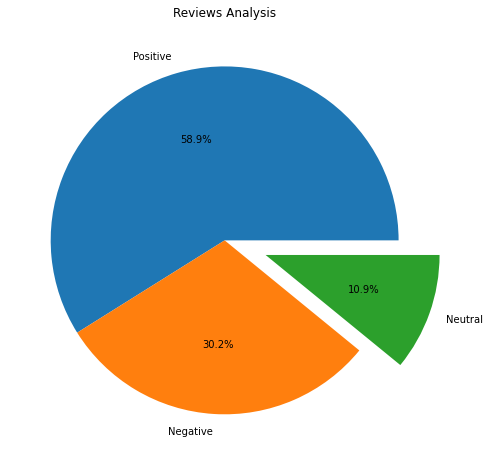

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))

#plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()

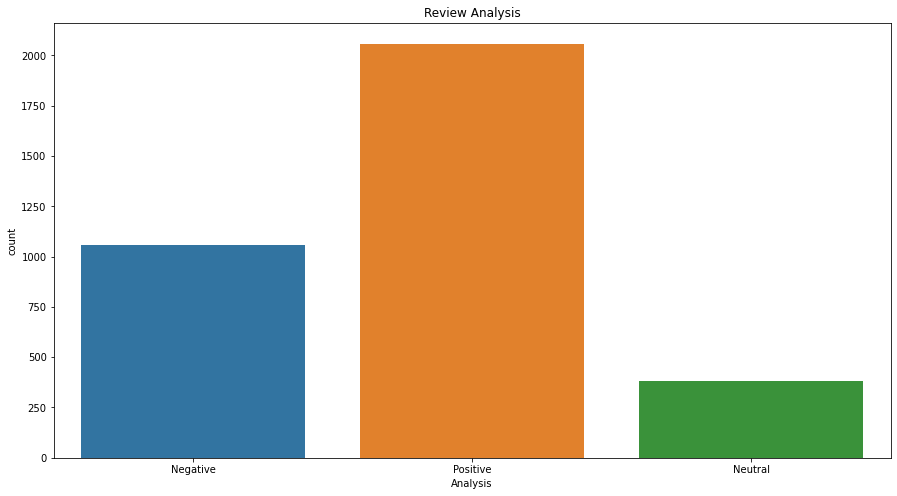

In [58]:
import seaborn as sns

plt.figure(figsize=(15,8))
sns.countplot(x=df.Analysis)
plt.title("Review Analysis")
plt.show()

In [51]:
df.to_csv("BA_reviews.csv")

**WordCloud**

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

In [52]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

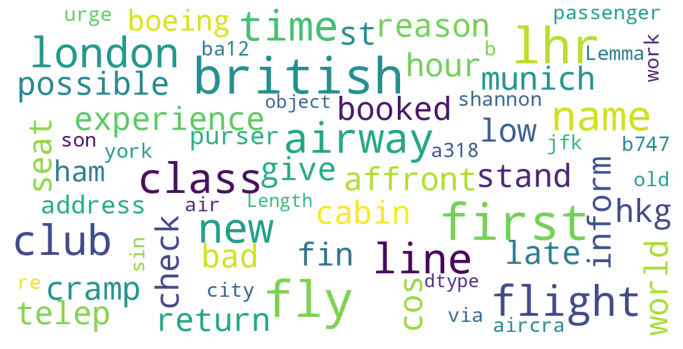

In [53]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)